# DM Project ON Housing DataSet Authors Ahmad Alsharif, Hassan Alharbi, Khaldoun Alkhoja


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Data exploration
print(df.head())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df.drop('Target', axis=1))
df_scaled = pd.DataFrame(features_scaled, columns=df.columns[:-1])
df_scaled['Target'] = df['Target']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('Target', axis=1), df_scaled['Target'], test_size=0.2, random_state=42)


C:\Users\xXham\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

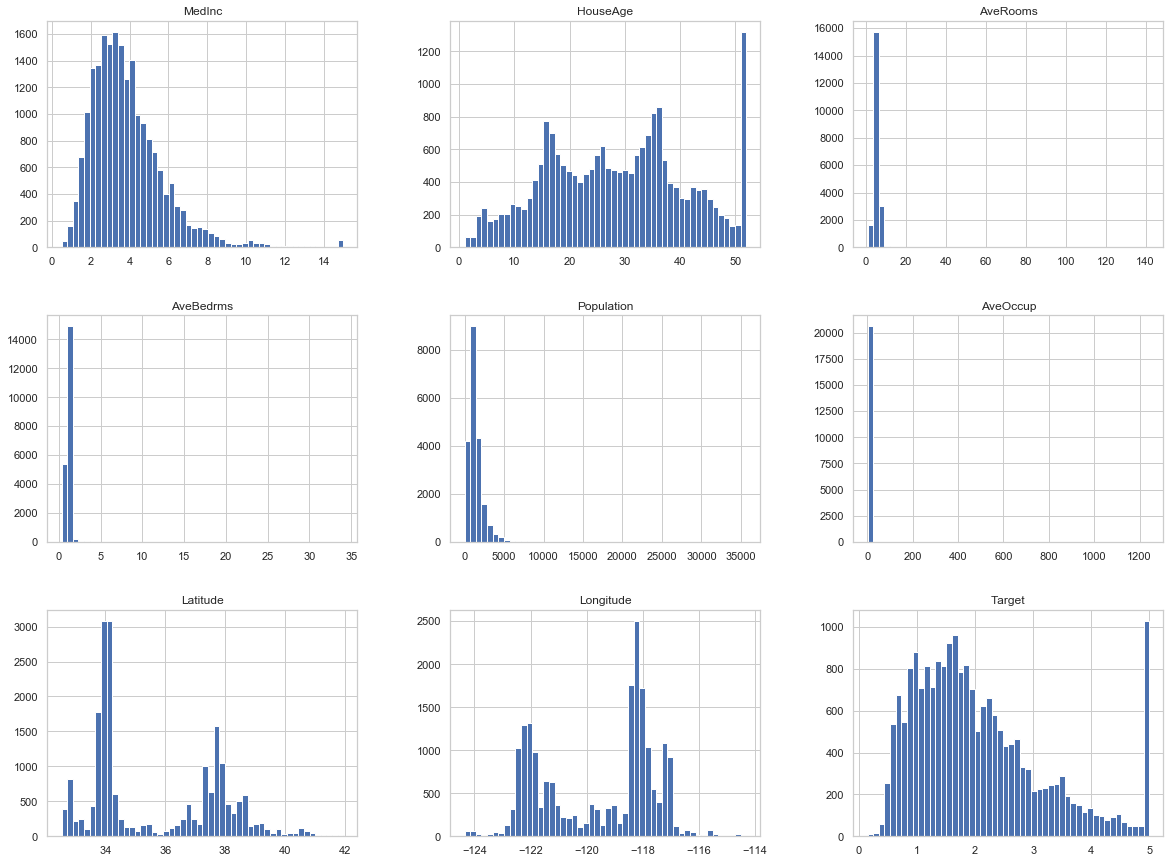

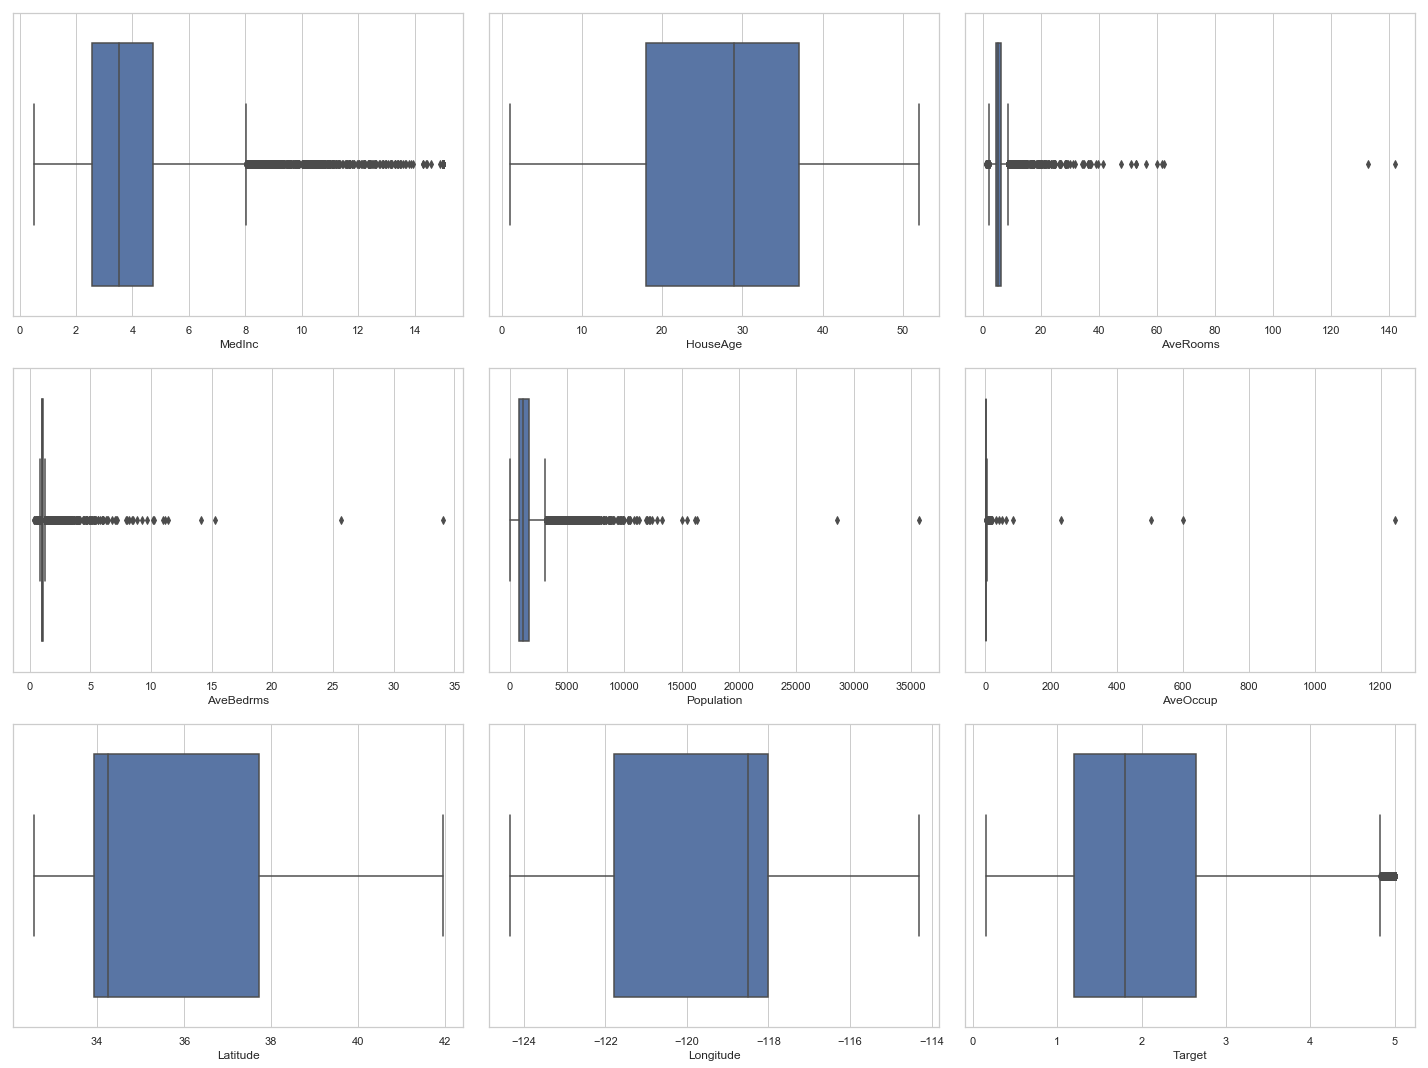

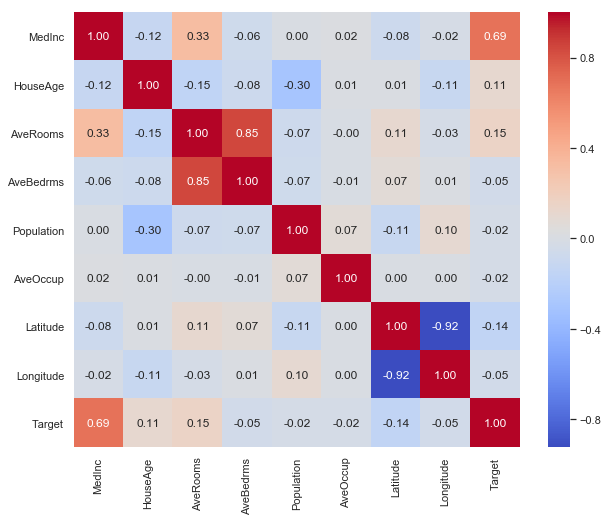

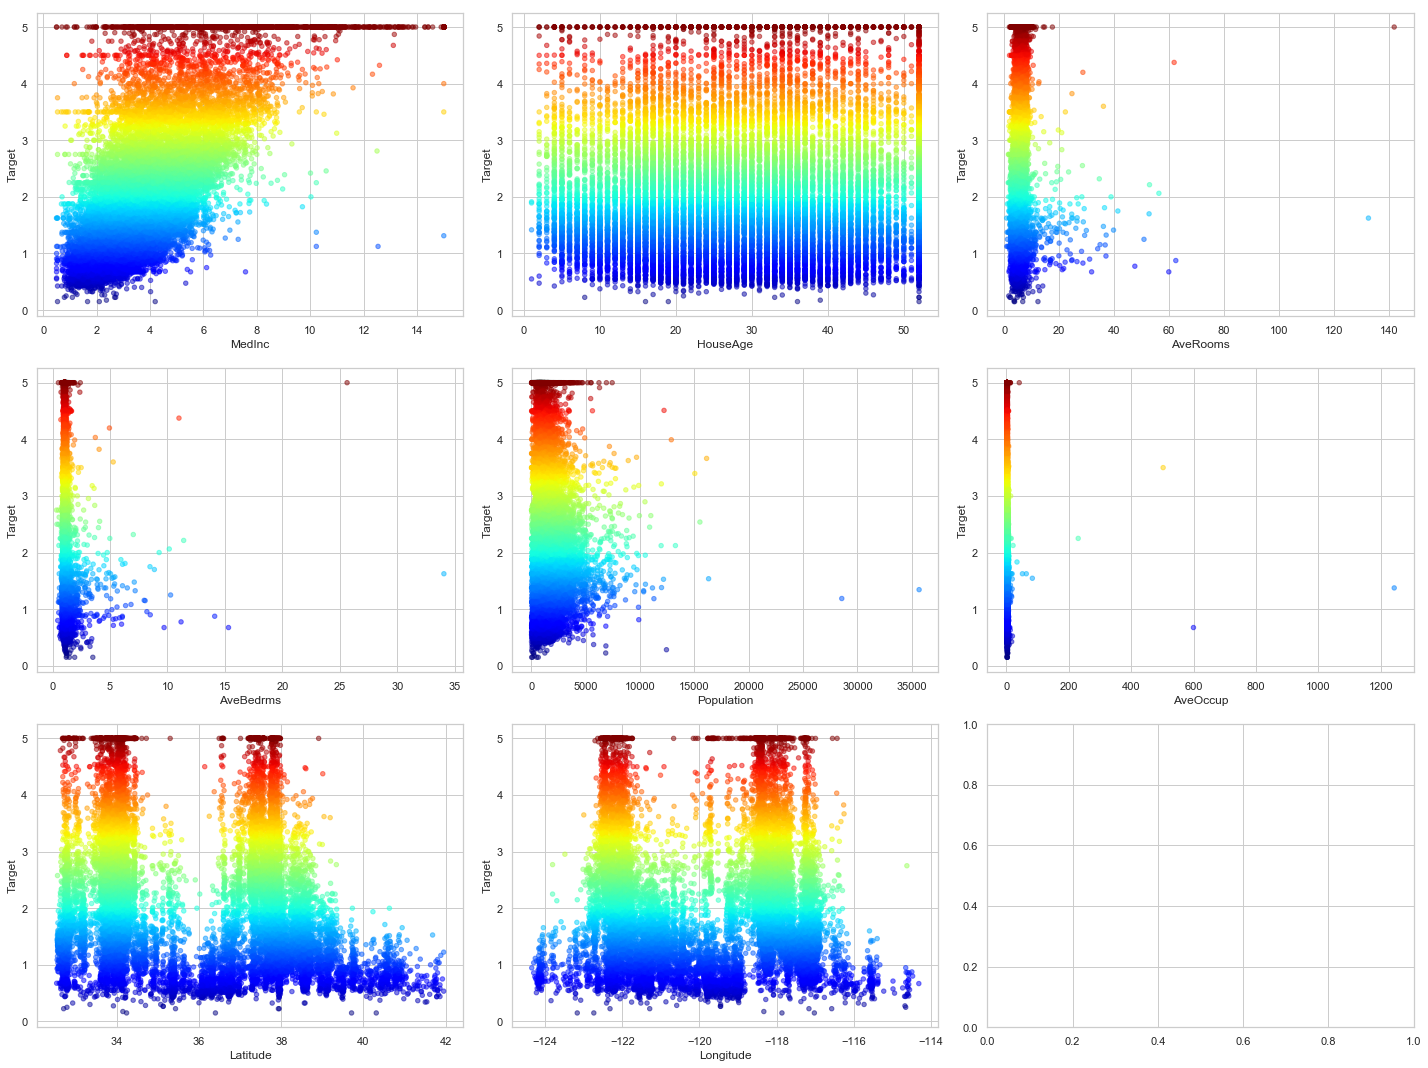

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histograms for each feature and the target
df.hist(bins=50, figsize=(20,15))
plt.show()

# Adjusting subplot arrangement to accommodate all nine plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Scatter plots for feature vs. target
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    df.plot(kind='scatter', x=col, y='Target', alpha=0.5, s=20, ax=axes[i//3, i%3], c='Target', cmap='jet', colorbar=False, sharex=False)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline setup
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Parameters for grid search
param_grid_lr = {
    'poly_features__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1, 10]
}

# Grid search with cross-validation
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_lr.fit(X_train, y_train)

# Best model and evaluation
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Best Linear Regression Model:", grid_lr.best_params_)
print("MSE:", mse_lr, "R2:", r2_lr)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Linear Regression Model: {'poly_features__degree': 1, 'ridge__alpha': 0.1}
MSE: 0.5558879138674181 R2: 0.5757905180002314


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline setup
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

# Simplified parameters for grid search
param_grid_dt = {
    'dt__max_depth': [None, 10, 20],  # Reduced range
    'dt__min_samples_leaf': [1, 4],  # Fewer options
    'dt__min_samples_split': [2, 10]  # Fewer options
}

# Grid search with cross-validation, using fewer folds to save time
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_dt.fit(X_train, y_train)

# Best model and evaluation
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Best Decision Tree Model:", grid_dt.best_params_)
print("MSE:", mse_dt, "R2:", r2_dt)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Decision Tree Model: {'dt__max_depth': 10, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
MSE: 0.4079055688221399 R2: 0.6887188842603058


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline setup
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Parameters for grid search to simplify and speed up the process
param_grid_rf = {
    'rf__n_estimators': [30, 50],  # Reduced number of trees
    'rf__max_depth': [5, 10],  # Reduced maximum depth
    'rf__min_samples_split': [4, 6]  # Increased min samples split
}

# Grid search with cross-validation, using fewer folds
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Model:", grid_rf.best_params_)
print("MSE:", mse_rf, "R2:", r2_rf)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Random Forest Model: {'rf__max_depth': 10, 'rf__min_samples_split': 6, 'rf__n_estimators': 50}
MSE: 0.2962274598033985 R2: 0.7739427425161144


In [19]:
from sklearn.metrics import mean_absolute_error

# Calculate RMSE and MAE for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)  # Set squared=False for RMSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression - MSE:", mse_lr, "RMSE:", rmse_lr, "MAE:", mae_lr, "R2:", r2_lr)

# Repeat for Decision Tree
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree - MSE:", mse_dt, "RMSE:", rmse_dt, "MAE:", mae_dt, "R2:", r2_dt)

# And for Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf, "RMSE:", rmse_rf, "MAE:", mae_rf, "R2:", r2_rf)


Linear Regression - MSE: 0.5558879138674181 RMSE: 0.7455789118982766 MAE: 0.5331994146968932 R2: 0.5757905180002314
Decision Tree - MSE: 0.4079055688221399 RMSE: 0.6386748537574811 MAE: 0.43129917000679024 R2: 0.6887188842603058
Random Forest - MSE: 0.2962274598033985 RMSE: 0.5442678199226907 MAE: 0.36732110318563854 R2: 0.7739427425161144


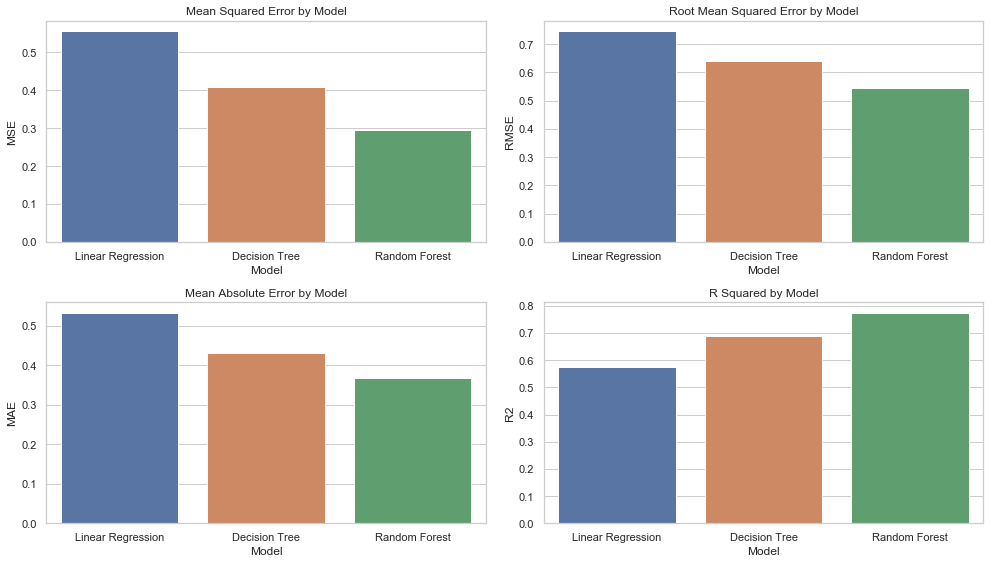

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the following variables are already calculated from the model evaluations
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Set up the matplotlib figure and axes
plt.figure(figsize=(14, 8))

# Plotting
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE', data=df_metrics)
plt.title('Mean Squared Error by Model')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE', data=df_metrics)
plt.title('Root Mean Squared Error by Model')
plt.ylabel('RMSE')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=df_metrics)
plt.title('Mean Absolute Error by Model')
plt.ylabel('MAE')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2', data=df_metrics)
plt.title('R Squared by Model')
plt.ylabel('R2')

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,  # These are already in the original scale
    'Predicted': y_pred_rf  # Predictions are also in the original scale
})
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the first 10 examples to see the comparison in true house prices
print(comparison_df.head(10))
#The values in ten thousands

        Actual  Predicted  Difference
20046  0.47700   0.572302   -0.095302
3024   0.45800   0.790835   -0.332835
15663  5.00001   4.846307    0.153703
20484  2.18600   2.426893   -0.240893
9814   2.78000   2.023702    0.756298
13311  1.58700   1.798498   -0.211498
7113   1.98200   2.376479   -0.394479
7668   1.57500   1.687031   -0.112031
18246  3.40000   2.688515    0.711485
5723   4.46600   4.816683   -0.350683
